# Seleccion del area a trabajar

In [1]:
import rasterio as rio
from rasterio.transform import from_origin
from rasterio import plot as rioplt
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

In [2]:
#Peligros Ayacucho
inputPathPaya = '../shapefileInput/Peligros_ayacucho/ayacucho_inv_peli_07_12_2015_point.shp'
#Departamentos Perú
inputPathDepa = '../shapefileInput/departamentos/DEPARTAMENTOS.shp'
#Provincias Perú
inputPathProv = '../shapefileInput/provincias/PROVINCIAS.shp'

### Lectura de los achivos de informacion geografica

In [3]:
shapePaya = gpd.read_file(inputPathPaya)
shapeDepa = gpd.read_file(inputPathDepa)
shapeProv = gpd.read_file(inputPathProv)

### Verificamos que esten en el mismo sistema de referencia de coordenadas(CRS)

In [4]:
print(shapePaya.crs)
print(shapeDepa.crs)
print(shapeProv.crs)

{'init': 'epsg:32718'}
{'init': 'epsg:4326'}
{'init': 'epsg:4326'}


* Tenemos que convertir a {'init': 'epsg:32618'}

In [5]:
shapePaya = shapePaya.to_crs({'init': 'epsg:32618'})
shapeDepa = shapeDepa.to_crs({'init': 'epsg:32618'})
shapeProv = shapeProv.to_crs({'init': 'epsg:32618'})

### Seleccionamos el departamento de Ayacucho y lo guardamos en un shapefile(.shp) con el CRS correcto.

In [6]:
shapeAyacucho = gpd.GeoDataFrame(shapeDepa.iloc[4:5], crs = shapeDepa.crs)
shapeAyacucho.to_file("../shapefileOutput/AYACUCHO.shp")

### Realizo una interseccion entre el departamento Ayacucho y las provincias peruanas, parar obtener las provincias de Ayacucho

In [7]:
shapeDaya = gpd.overlay(shapeAyacucho, shapeProv, how='intersection')

### Seleccionamos un distrito del departamento de ayacucho y lo guardamos en un shapefile(.sho) con el CRS correcto.

In [8]:
shapeRegS = gpd.GeoDataFrame(shapeDaya.iloc[[18]], crs = shapeDaya.crs)
shapeRegS.to_file("../shapefileOutput/regionSeleccionada/REGS.shp")

### Seleccionamos los puntos geograficos de las zonas peligrosas que se encuentran en la provincia seleccionada y lo guardamos en un shapefile(.sho) con el CRS correcto.

In [9]:
shapeRegP = gpd.GeoDataFrame(shapePaya[shapePaya.intersects(shapeRegS.unary_union)], crs = shapeDaya.crs)
shapeRegP.to_file("../shapefileOutput/puntosSeleccionados/REGP.shp")

### Hacemos la lectura de los archivos guardados

In [10]:
shapeAyacucho = gpd.read_file("../shapefileOutput/AYACUCHO.shp")
shapeRegS = gpd.read_file("../shapefileOutput/regionSeleccionada/REGS.shp")
shapeRegP = gpd.read_file("../shapefileOutput/puntosSeleccionados/REGP.shp")

### Graficamos la provincia elegida con las ubicaciones de las zonas peligrosas

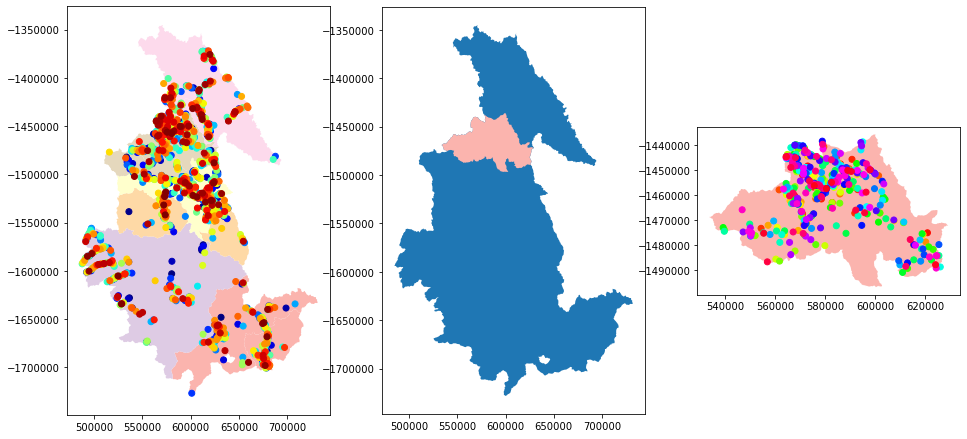

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 16))
shapeDaya.plot(ax=ax1, cmap = 'Pastel1')
shapePaya.plot(ax=ax1, cmap = 'jet')
shapeAyacucho.plot(ax=ax2)
shapeRegS.plot(ax=ax2, cmap = 'Pastel1')
shapeRegS.plot(ax=ax3, cmap = 'Pastel1')
shapeRegP.plot(ax=ax3, cmap = 'hsv')

plt.show()